In [30]:
import pywt
import pywt.data
import matplotlib.pyplot as plt

In [2]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [3]:
pywt.families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [4]:
pywt.wavelist('db')

['db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38']

In [23]:
wavelet = pywt.DiscreteContinuousWavelet('db1')
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


maximum level is 7


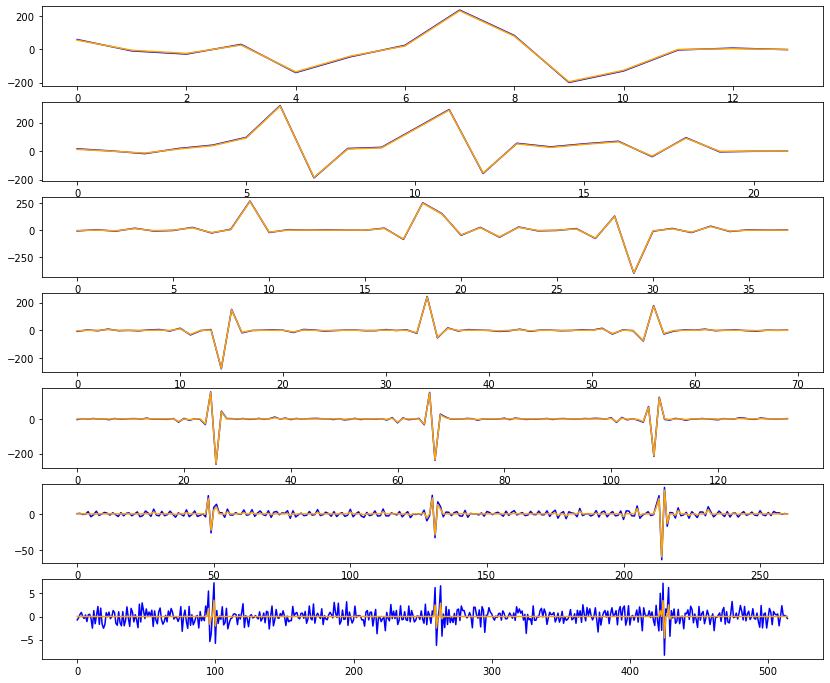

In [109]:
import pywt
import sys

raw_data = pywt.data.ecg()  # Example

x = np.arange(1, len(raw_data))
y = raw_data

wavelet = pywt.DiscreteContinuousWavelet('sym4')
max_level = pywt.dwt_max_level(len(y), wavelet.dec_len)  # Maximum level of decomposition
print("maximum level is " + str(max_level))
threshold = np.sqrt(2*np.log(len(y))) # Threshold for filtering, sqrt(2*log(n))?

# Decompose into wavelet components
coeffs = pywt.wavedec(y, 'sym4', level=max_level)

plt.figure(figsize=(14, 12))
for i in range(1, len(coeffs)):
    plt.subplot(max_level, 1, i)
    plt.plot(coeffs[i], color='blue')
    coeffs[i] = pywt.threshold(coeffs[i], threshold)
    plt.plot(coeffs[i], color='orange')

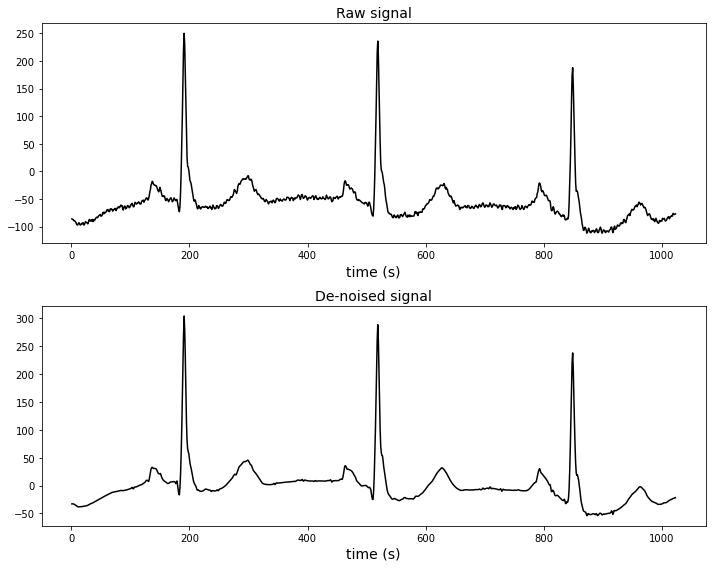

In [110]:
reconstruction = pywt.waverec(coeffs, 'sym4')

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(x[0:len(x)], y[0:len(x)], color='black')
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title("Raw signal", fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(x[0:len(x)], reconstruction[0:len(x)] - np.mean(reconstruction[0:len(x)]), color='black')
plt.xlabel('time (s)', fontsize=14)
plt.ylabel('', fontsize=14)
plt.title("De-noised signal", fontsize=14)

plt.tight_layout()
plt.show()